In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from diabetes_prediction.utils.data import *

# 1. Generate Dataset

In [2]:
data_ids = ['family', 'sample_adult', 'sample_child']

metadatas, datas = {}, {}
for data_id in data_ids:
    metadatas[data_id], datas[data_id] = load_dataset(data_id)

* _get_summary                 | 0.88s (0.01m)
* _get_layout                  | 1.28s (0.02m)
* _merge_summary_layout        | 0.01s (0.00m)
* load_metadata                | 2.18s (0.04m)
* load_dataset                 | 2.36s (0.04m)
* _get_summary                 | 0.33s (0.01m)
* _get_layout                  | 6.64s (0.11m)
* _merge_summary_layout        | 0.01s (0.00m)
* load_metadata                | 7.01s (0.12m)
* load_dataset                 | 7.86s (0.13m)
* _get_summary                 | 0.08s (0.00m)
* _get_layout                  | 1.34s (0.02m)
* _merge_summary_layout        | 0.01s (0.00m)
* load_metadata                | 1.44s (0.02m)
* load_dataset                 | 1.50s (0.02m)


In [3]:
metadata, data = load_merged_datas(metadatas, datas)

* load_merged_datas            | 3.38s (0.06m)


# 2. Preprocessing

In [4]:
dataset = split_dataset(data, drop_unknown=True)

Remove records with unknown label (762 records from 25417 records).
Split dataset into train, validation, test set.
- Train set: 14793
- Validation set: 4931
- Test set: 4931
* split_dataset                | 0.13s (0.00m)


In [5]:
dataset_proc = load_processed_dataset(metadata, dataset, overwrite=True)

* _replace_ambiguous_options   | 0.62s (0.01m)
* _impute_data                 | 0.73s (0.01m)
* _set_dtypes                  | 11.36s (0.19m)
* _impute_numerical_features   | 0.56s (0.01m)
* _drop_columns                | 0.41s (0.01m)
* _manual_handling             | 0.32s (0.01m)
* _drop_diabetes_columns       | 0.08s (0.00m)
* _standardize                 | 0.10s (0.00m)
* _label_encoding              | 0.00s (0.00m)
* fit_transform                | 14.21s (0.24m)
* _replace_ambiguous_options   | 0.60s (0.01m)
* _impute_data                 | 0.55s (0.01m)
* _set_dtypes                  | 0.35s (0.01m)
* _impute_numerical_features   | 0.33s (0.01m)
* _drop_columns                | 0.21s (0.00m)
* _manual_handling             | 0.34s (0.01m)
* _drop_diabetes_columns       | 0.04s (0.00m)
* _standardize                 | 0.03s (0.00m)
* _label_encoding              | 0.00s (0.00m)
* transform                    | 2.45s (0.04m)
* _replace_ambiguous_options   | 0.61s (0.01m)
* _impute_d

# 3. Feature Selection

## 3.1 Numerical Features

### 3.1.1 Correlation Coefficients

In [ ]:
# train_data = dataset_proc['train']

#### 3.1.1.1 Correlation between Features vs Target
Select features with cumulative sum of `|corr(X, y)|` threshold.

In [ ]:
# feature_selector = CorrelationYFeatureSelector(metadata, train_data)
# feature_selector.select(0.3)

#### 3.1.1.2 Correlation between Features
Drop highly correlated features.

In [ ]:
# feature_selector = CorrelationXFeatureSelector(metadata, train_data)
# feature_selector.select(0.8)

### 3.1.2 Multicollinearity
#### 1) VIF
1. Detect multicollinearity using **Variance Inflation Factor (VIF)** \
VIF: Measure the strength of correlation between predictor variables
2. Interprete VIF
    - `VIF = 1` : **No correlation** between predictor variable and any other predictor variables.
    - `1 < VIF ≤ 5` : **Moderate correlation** ~.
    - `5 < VIF` : **Severe correlation** ~
    
#### 2) Correlation Coefficients
1. Select biggest 

In [ ]:
# feature_selector = CorrelationXYFeatureSelector(metadata, train_data)
# selected_features = feature_selector.select(0.5)

In [ ]:
# vif_data = get_VIF(train_data[selected_features], plot=True)

In [ ]:
# plot_correlations(train_data, vif_data, selected_features)

In [ ]:
# n_features = 10
# fig, axes = plt.subplots(ncols=n_features, figsize=(28, 2))
# for ax, f in zip(axes.flat, selected_features):
#     sns.histplot(train_data, x=f, hue=PARAMS.target, ax=ax, stat='probability')
#     if ax is not axes[0]:
#         ax.set_ylabel(None), ax.set_yticklabels([])
# merge_features_metadata(selected_features, metadata).head(n_features)

In [6]:
from sklearn.linear_model import LogisticRegression

base_estimator = LogisticRegression(random_state=PARAMS.seed)

* get_corr                     | 2.48s (0.04m)


100% 10/10 [00:20<00:00,  2.05s/it]


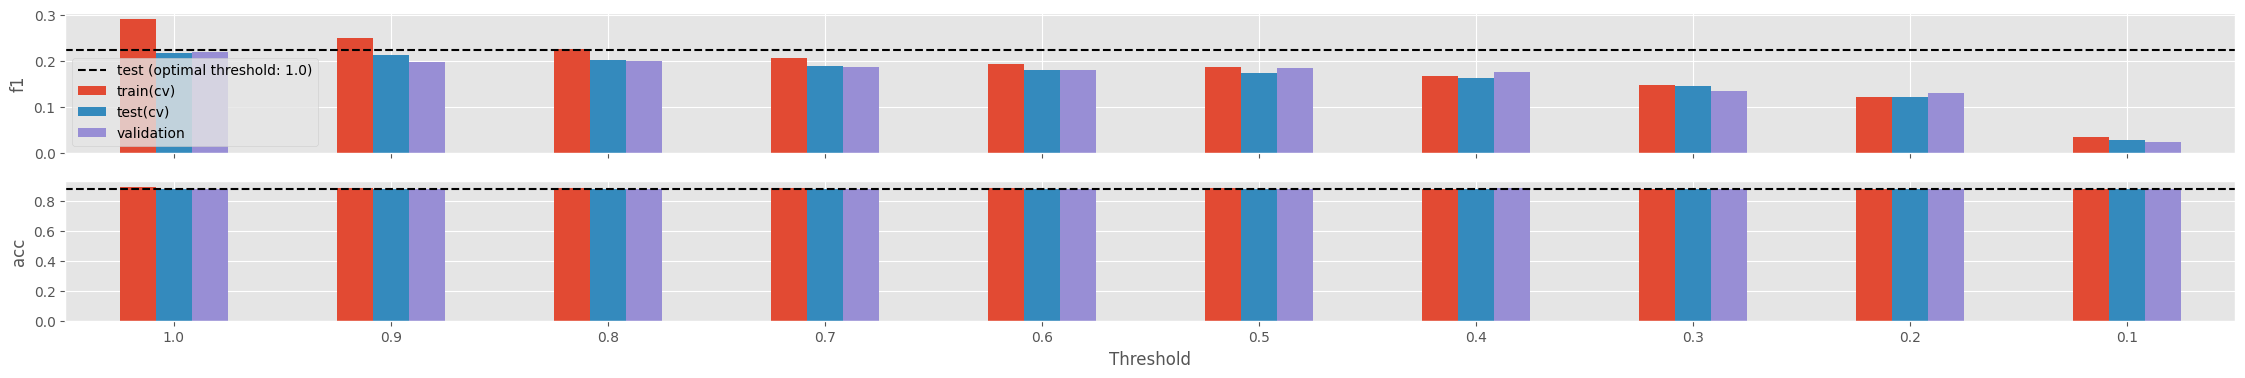

In [12]:
corr_y_feature_selector = CorrelationYFeatureSelector(metadata, dataset_proc['train'])
rst, summary = experiment(metadata, dataset_proc, base_estimator, corr_y_feature_selector)

* get_corr                     | 2.47s (0.04m)


100% 10/10 [00:27<00:00,  2.76s/it]


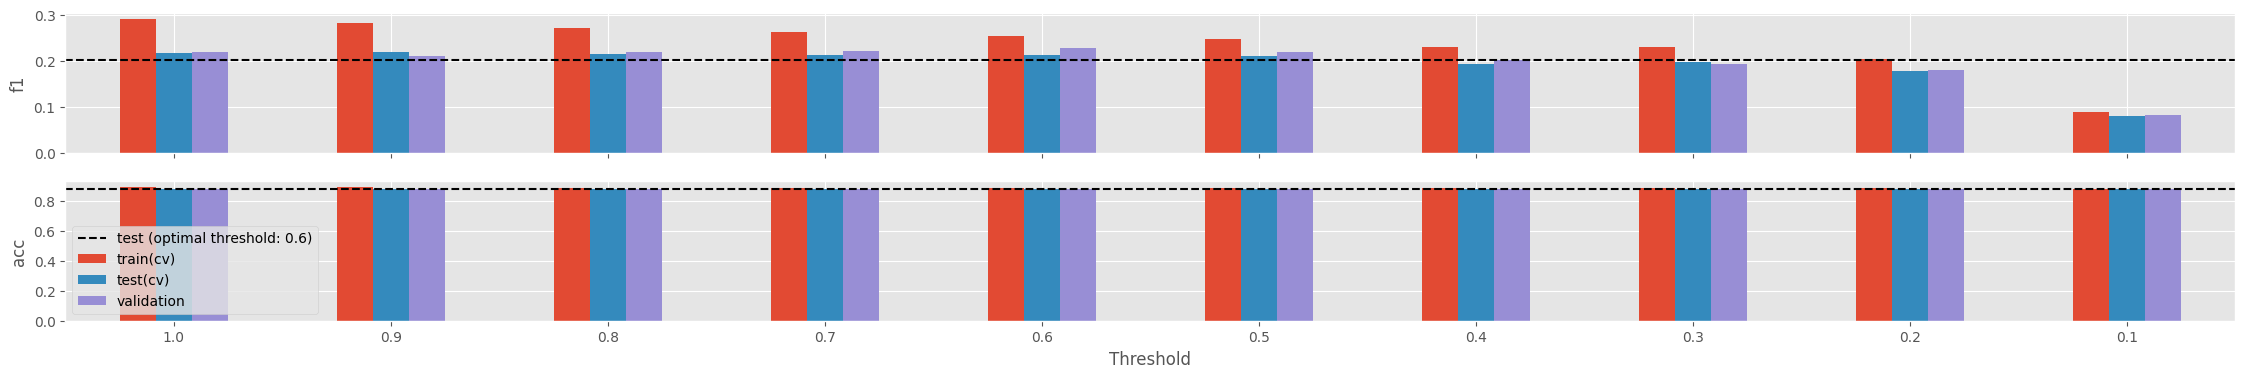

In [16]:
corr_xy_feature_selector = CorrelationXYFeatureSelector(metadata, dataset_proc['train'])
rst, summary = experiment(metadata, dataset_proc, base_estimator, corr_xy_feature_selector)

100% 10/10 [00:32<00:00,  3.29s/it]


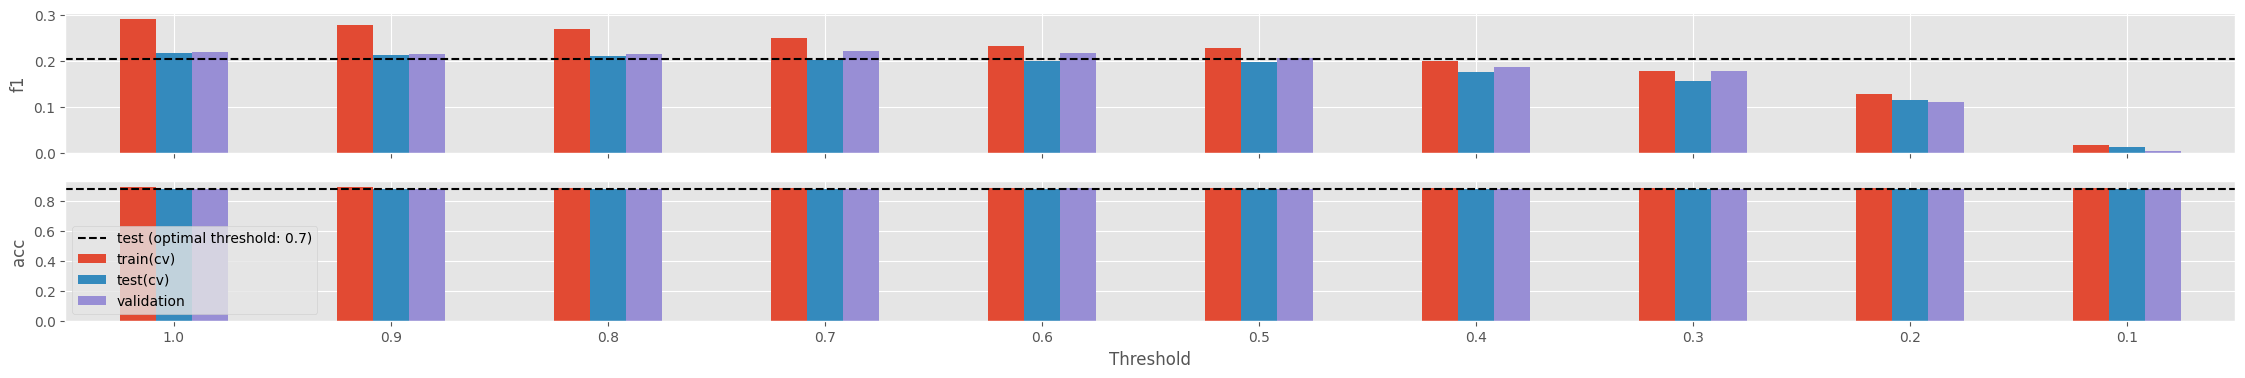

In [17]:
corr_x_feature_selector = CorrelationXFeatureSelector(metadata, dataset_proc['train'])
rst, summary = experiment(metadata, dataset_proc, base_estimator, corr_x_feature_selector)